Instructions
1. Data Preparation:
- Download and explore the Global Superstore Orders dataset.
- Perform basic data cleaning and preprocessing.

2. Data Visualization with Plotly:
- Create an interactive line chart to show sales trends over the years.
- Build an interactive map to visualize sales distribution by country.

3. Data Visualization with Plotnine:
- Use Plotnine to generate a bar chart showing top 10 products by sales.
- Create a scatter plot to analyze the relationship between profit and discount.

4. Comparative Analysis:
- Compare the insights gained from Plotly and Plotnine visualizations.
- Document your observations about the ease of use and effectiveness of both tools.

5. Code and Insights:
- Write clear, well-documented Python code.
- Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns


data = pd.read_excel('/content/US_Superstore_data.xls')
df = pd.DataFrame(data)

df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df['Sales'].sort_values() #i want to see that there are no NAs or negative numbers

4101        0.444
9292        0.556
8658        0.836
4711        0.852
2106        0.876
          ...    
4190    10499.970
2623    11199.968
8153    13999.960
6826    17499.950
2697    22638.480
Name: Sales, Length: 9994, dtype: float64

In [34]:
df['Order Date'] == pd.to_datetime(df['Order Date']) #converting order date to date format for further manipulation
df['Year'] = df['Order Date'].dt.year #creating new column called year

In [35]:
df['Year'].value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: Year, dtype: int64

In [36]:
year_group = df.groupby('Year').sum()

<ipython-input-36-0ba88cc6b830>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_group = df.groupby('Year').sum()


In [37]:
year_group

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Year,,,,,,
2014,9904015,113271247,484247.4981,7581,315.46,49543.9741
2015,10413696,111208247,470532.5090,7979,327.09,61618.6037
2016,12778804,141003420,609205.5980,9837,400.32,81795.1743
2017,16848500,186089738,733215.2552,12476,518.22,93439.2696


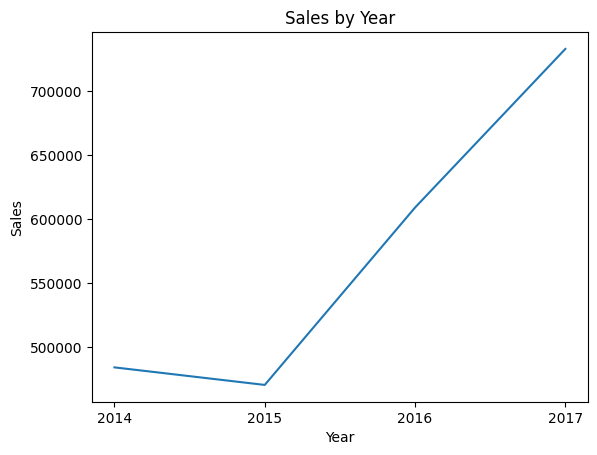

In [39]:
sns.lineplot(x=year_group.index, y='Sales', data=year_group)
plt.title('Sales by Year')
plt.xticks(year_group.index)
plt.show()

In [53]:
state_group = df.groupby('State').sum()
state_group = state_group.sort_values(by='Sales').tail(10) # I need to narrow down the states, otherwise it's unreadable.
state_group

<ipython-input-53-7645ef2c0c9e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_group = df.groupby('State').sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Year
State,,,,,,,
Virginia,1218137,5124335,70636.7200,893,0.00,18597.9504,451437
Michigan,1200167,12356103,76269.6140,946,1.80,24463.1876,513982
Ohio,2355994,20579836,78258.1360,1759,152.40,-16971.3766,945396
Illinois,2571481,29873772,80166.1010,1845,191.90,-12607.8870,991740
Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017,771997
Pennsylvania,2768523,11190565,116511.9140,2153,192.90,-15559.9603,1183222
Washington,2584458,49661687,138641.2700,1883,32.40,33402.6517,1020048
Texas,5085541,75747693,170188.0458,3724,364.64,-25729.3563,1985440
New York,5452096,11835721,310876.2710,4224,62.40,74038.5486,2273750


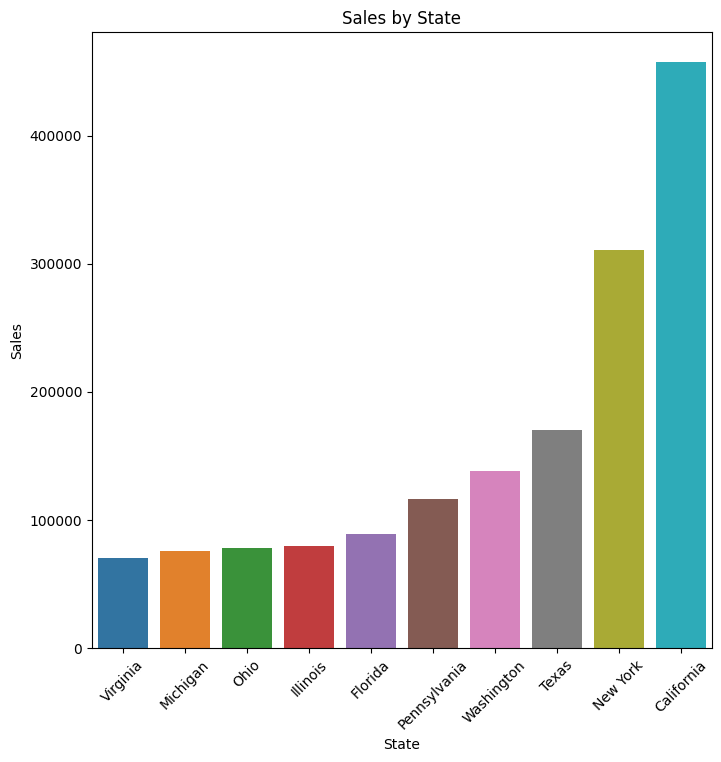

In [57]:
plt.figure(figsize=(8, 8))

sns.barplot(x=state_group.index, y='Sales', data=state_group)
plt.title('Sales by State')
plt.xticks(rotation=45)
plt.show()